In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
# Load the data
data = pd.read_csv('../data/external/wine_clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [15]:
# Perform principal component analysis for further use
pca = PCA(n_components = 13)
pca.fit_transform(X_scaled)
pca_results = pd.DataFrame(data=pca.explained_variance_ratio_,
                           columns=["Explained Variance"],
                           index=range(1,14))
pca_results["Cumulative Explained Variance"] = pca_results["Explained Variance"].cumsum()
pca_results

,Explained Variance,Cumulative Explained Variance
1,0.361988,0.361988
2,0.192075,0.554063
3,0.111236,0.665300
4,0.070690,0.735990
5,0.065633,0.801623
6,0.049358,0.850981
7,0.042387,0.893368
8,0.026807,0.920175
9,0.022222,0.942397
10,0.019300,0.961697


In [16]:
# Set the dimension number to 3
pca3 = PCA(n_components = 3)
X_pca3 = pca3.fit_transform(X_scaled)
X_pca3 = pd.DataFrame(X_pca3)
X_pca3.columns = ["P1", "P2", "P3"]

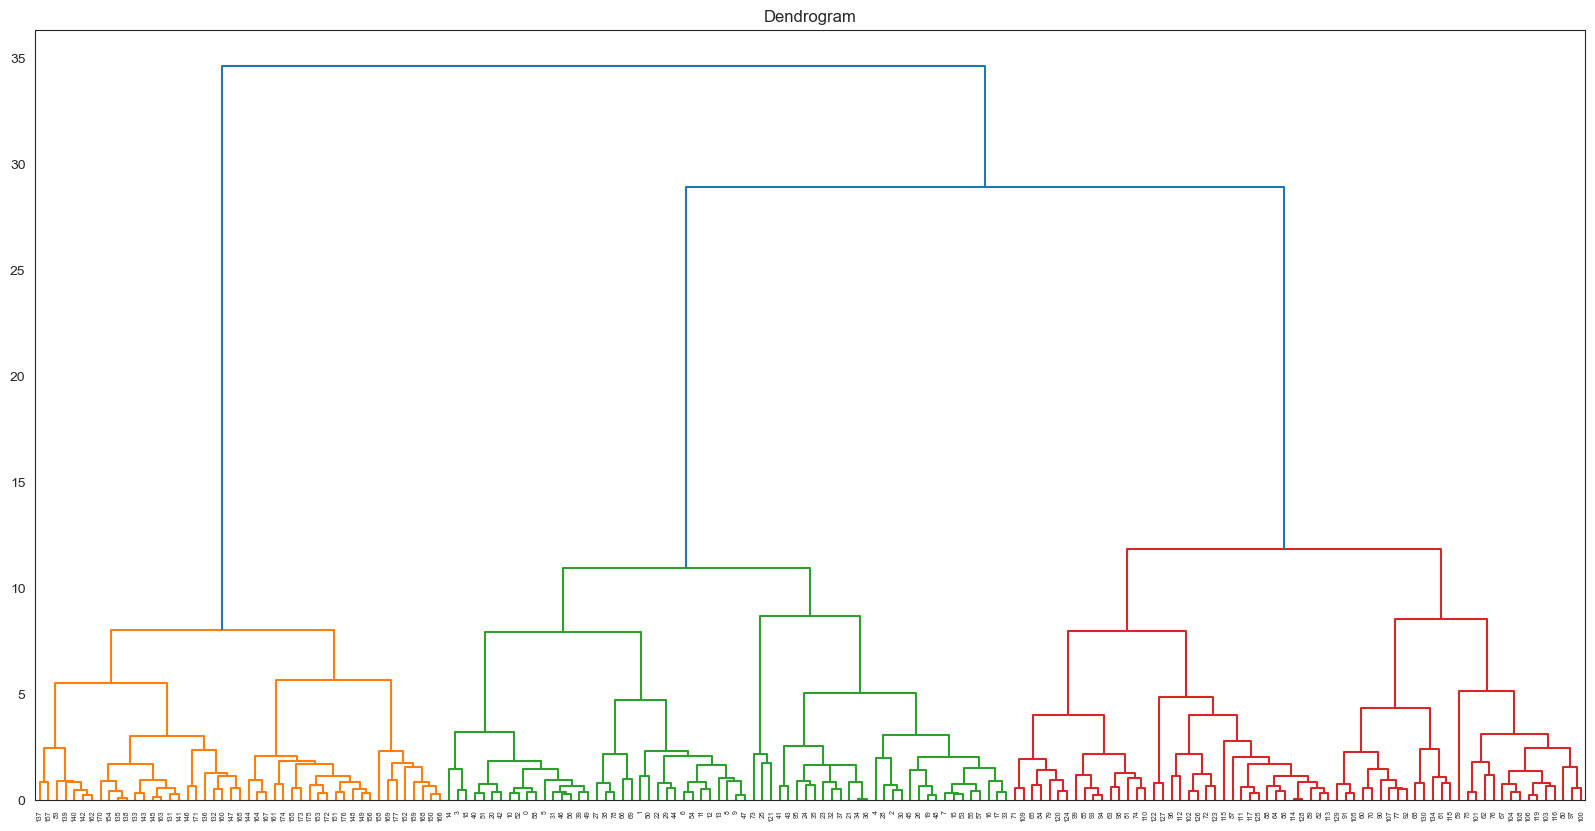

In [17]:
# Display the dendrogram to see the structure of the data
sns.set_style('white')
plt.figure(figsize=(20, 10))
dendrogram((linkage(X_pca3, metric='euclidean', method='ward')))
plt.title('Dendrogram')
plt.savefig(fname='../reports/figures/dendrogram.png')
plt.show()

In [18]:
# Use the agglomeration distances to determine which link in dendogram should be cut
agglomerative = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward', compute_distances=True)
agglomerative.fit_predict(X_pca3)
distances = agglomerative.distances_
leaves = agglomerative.n_leaves_

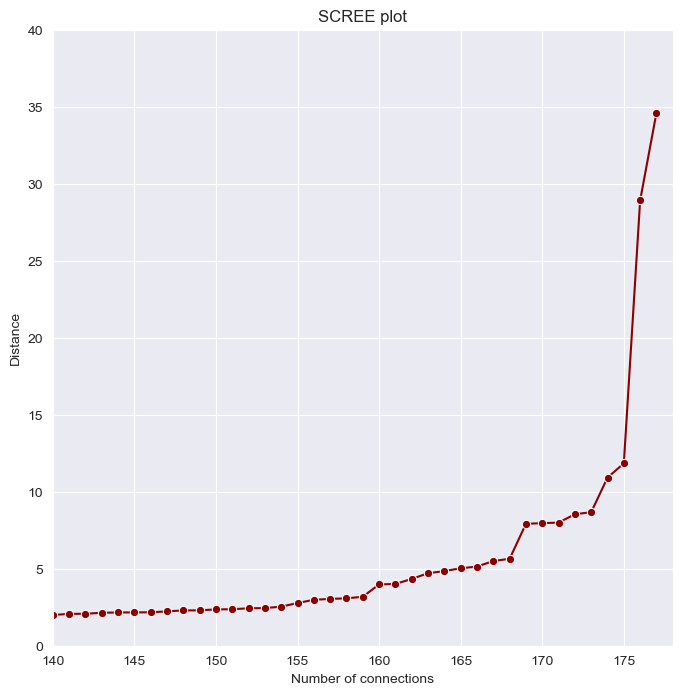

In [19]:
# Plot the agglomeration distances
sns.set_style('darkgrid')
plt.figure(figsize=(8, 8))
sns.lineplot(x=range(1, leaves),
             y=distances,
             marker='o',
             color='darkred')

# Set the title and axis labels
plt.title("SCREE plot")
plt.xlabel("Number of connections")
plt.ylabel("Distance")

# Set axis limits
plt.xlim(140, 178)
plt.ylim(0, 40)

plt.savefig(fname='../reports/figures/scree_plot.png')
plt.show()

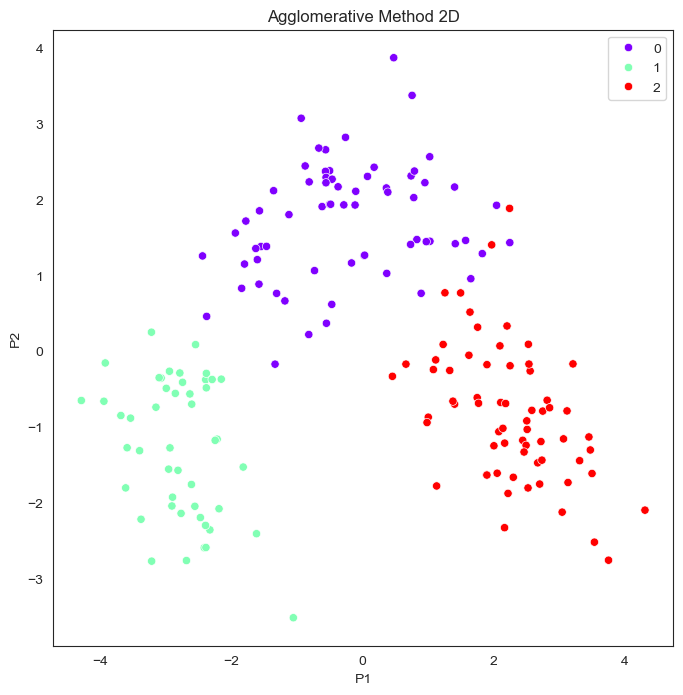

In [20]:
# Fit agglomerative clustering model and plot it
agglomerative_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

sns.set_style('white')
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca3['P1'],
                y=X_pca3['P2'], 
                hue = agglomerative_model.fit_predict(X_pca3),
                palette ='rainbow')

# Set the title
plt.title("Agglomerative Method 2D")

plt.savefig(fname='../reports/figures/agglomerative_method_2D.png')
plt.show()

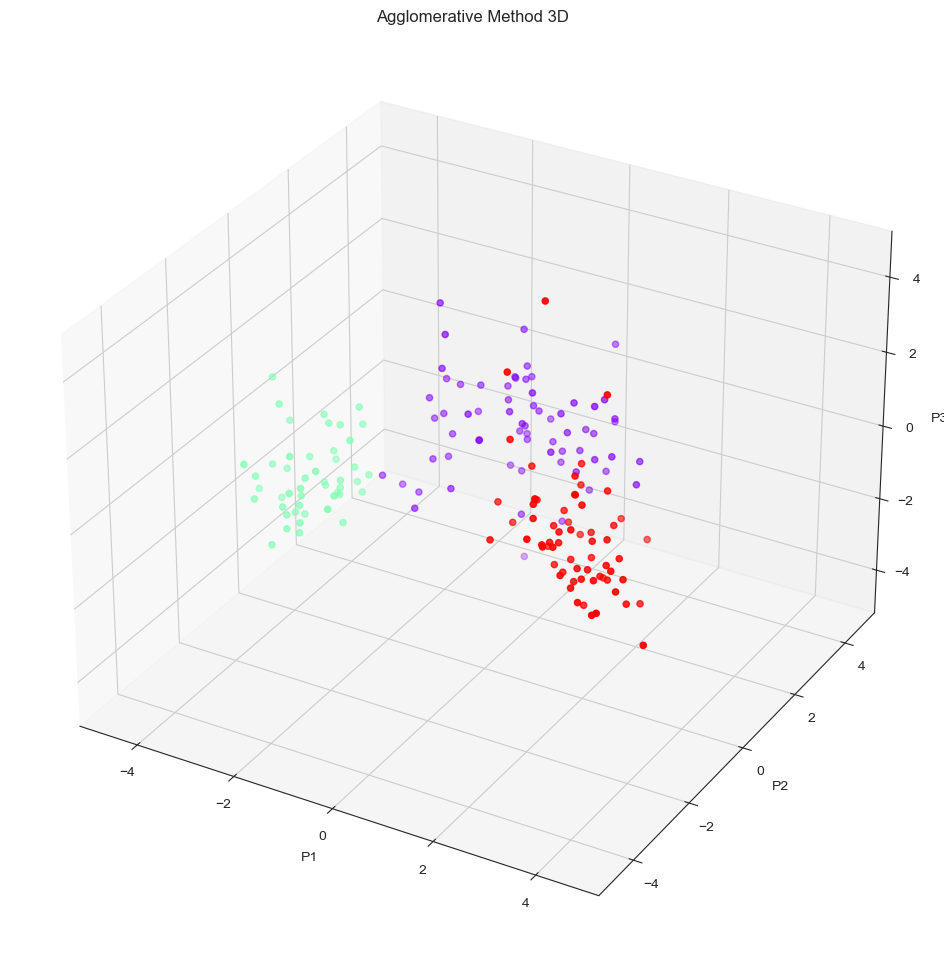

In [21]:
# Plot the clusters in 3D
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca3["P1"],
             X_pca3["P2"],
             X_pca3["P3"],
             c=agglomerative_model.fit_predict(X_pca3),
             cmap='rainbow')

# Set the title and axis labels
plt.title("Agglomerative Method 3D")
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

plt.savefig(fname='../reports/figures/agglomerative_method_3D.png')
plt.show()

In [22]:
# Calculate the Silhouette score
silhouette_score(X_pca3, agglomerative_model.fit_predict(X_scaled))

0.4271020837973854

In [23]:
# Use the eolbow method to determine the number of clusters
clusters = range(1,9)
wcss = []

for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(X_pca3)
    wcss.append(kmeans.inertia_)
    
elbow = pd.DataFrame(data={'WCSS': wcss}, index=clusters)
elbow

C:\Users\matid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,WCSS
1,1539.503480
2,886.592792
3,513.056465
4,430.664605
5,381.372196
6,325.031135
7,297.381404
8,266.857864


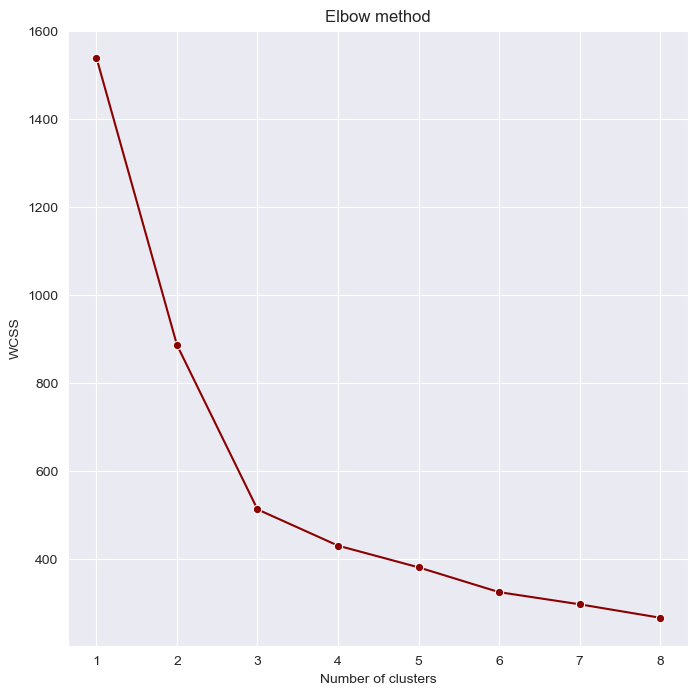

In [24]:
# Plot the elbow
sns.set_style('darkgrid')
plt.figure(figsize=(8, 8))
sns.lineplot(data=elbow,
             x=elbow.index,
             y="WCSS",
             marker='o',
             color='darkred')

# Set the title and axis labels
plt.title("Elbow method")
plt.xlabel("Number of clusters")

plt.savefig(fname='../reports/figures/elbow_method.png')
plt.show()

C:\Users\matid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


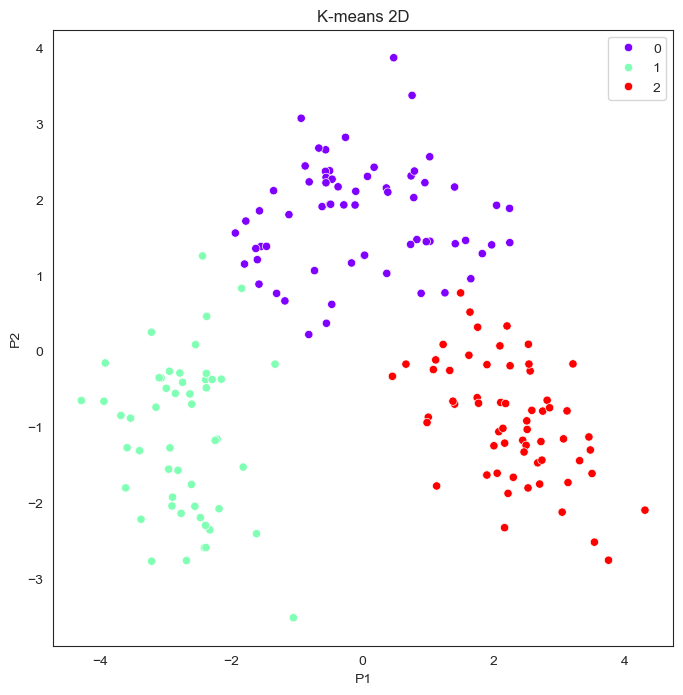

In [25]:
# Fit the KMeans model with 3 clusters and plot it
kmeans_model = KMeans(n_clusters=3, random_state=42)

sns.set_style('white')
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca3['P1'],
                y=X_pca3['P2'], 
                hue = kmeans_model.fit_predict(X_pca3),
                palette ='rainbow')

# Set the title
plt.title("K-means 2D")

plt.savefig(fname='../reports/figures/kmeans_2D.png')
plt.show()

C:\Users\matid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


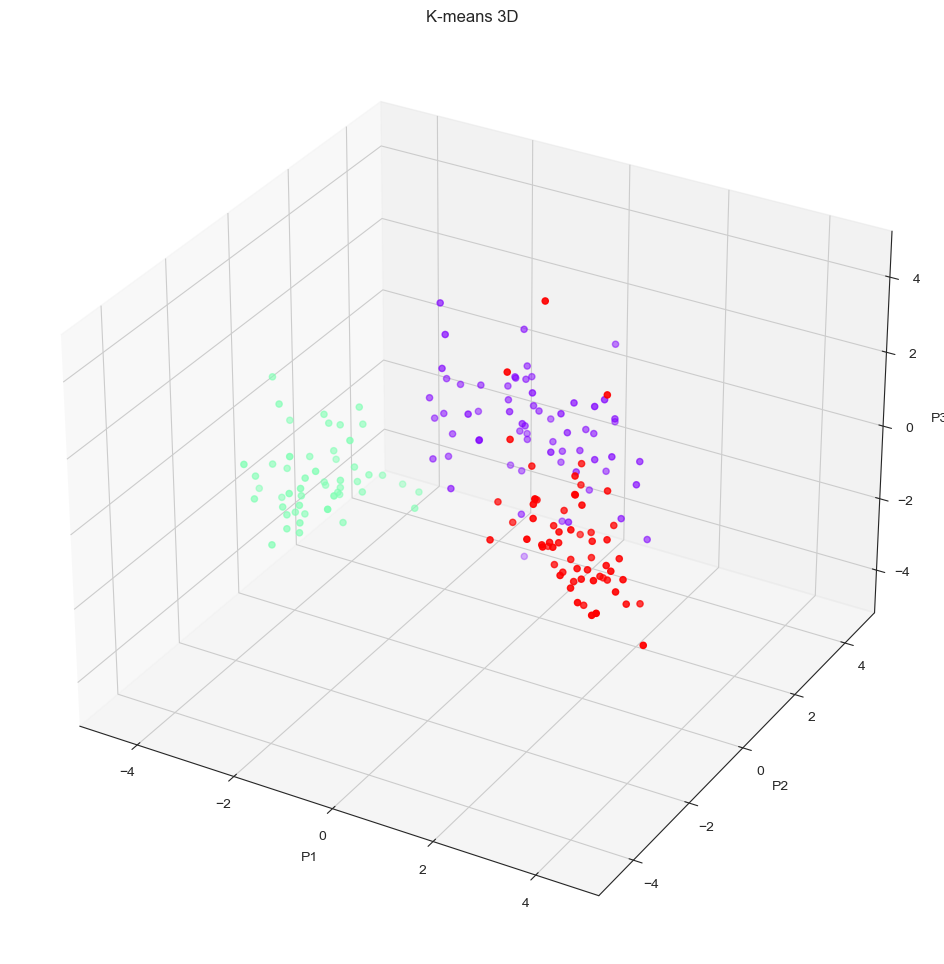

In [26]:
# Plot the clusters in 3D
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca3["P1"],
             X_pca3["P2"],
             X_pca3["P3"],
             c=kmeans_model.fit_predict(X_pca3),
             cmap='rainbow')

# Set the title and axis labels
plt.title("K-means 3D")
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

plt.savefig(fname='../reports/figures/kmeans_3D.png')
plt.show()

In [27]:
# Calculate the Silhouette score
silhouette_score(X_pca3, kmeans_model.fit_predict(X_pca3))

C:\Users\matid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.45379998482576156